In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [161]:
city_data_df = "../raw_data/city_data.csv"
ride_data_df = "../raw_data/ride_data.csv"

cities_df = pd.read_csv(city_data_df)
rides_df = pd.read_csv(ride_data_df)

In [162]:
combined_df = pd.merge(cities_df, rides_df, on="city" )
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [163]:
grouped_city_df = combined_df.groupby(["city","type"])
grouped_city_df.count().head()

,,driver_count,date,fare,ride_id
city,type,,,,
Alvarezhaven,Urban,31,31,31,31
Alyssaberg,Urban,26,26,26,26
Anitamouth,Suburban,9,9,9,9
Antoniomouth,Urban,22,22,22,22
Aprilchester,Urban,19,19,19,19


In [164]:
city_fare = grouped_city_df["fare"].sum()
city_fare.head()

city          type    
Alvarezhaven  Urban       741.79
Alyssaberg    Urban       535.85
Anitamouth    Suburban    335.84
Antoniomouth  Urban       519.75
Aprilchester  Urban       417.65
Name: fare, dtype: float64

In [165]:
city_rides = grouped_city_df["ride_id"].count()
city_rides.head()

city          type    
Alvarezhaven  Urban       31
Alyssaberg    Urban       26
Anitamouth    Suburban     9
Antoniomouth  Urban       22
Aprilchester  Urban       19
Name: ride_id, dtype: int64

In [166]:
average_fare = city_fare/city_rides
average_fare.head()

city          type    
Alvarezhaven  Urban       23.928710
Alyssaberg    Urban       20.609615
Anitamouth    Suburban    37.315556
Antoniomouth  Urban       23.625000
Aprilchester  Urban       21.981579
dtype: float64

In [167]:
city_summary_table = pd.DataFrame({"Average Fare":average_fare,
                                   "Total Number of Rides(Per City)": city_rides})
city_summary_table.head()

,,Average Fare,Total Number of Rides(Per City)
city,type,,
Alvarezhaven,Urban,23.928710,31
Alyssaberg,Urban,20.609615,26
Anitamouth,Suburban,37.315556,9
Antoniomouth,Urban,23.625000,22
Aprilchester,Urban,21.981579,19


In [168]:
city_summary_table.plot(kind="scatter", x="Total Number of Rides(Per City)", y="Average Fare", grid=True, figsize=(15,5),
              title="Pyber Ride Sharing Data(2016)")

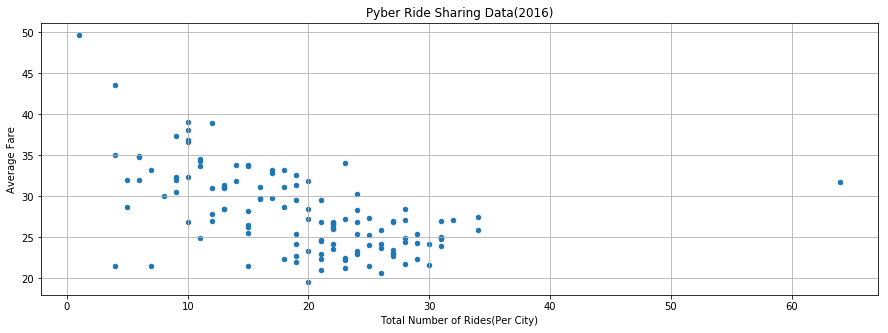

In [169]:
plt.show()

In [170]:
city_df = combined_df.groupby(["type"])
city_df.count().head()

,city,driver_count,date,fare,ride_id
type,,,,,
Rural,125,125,125,125,125
Suburban,657,657,657,657,657
Urban,1625,1625,1625,1625,1625


In [171]:
# % of Total Fares by City Type

city_type_fare = city_df["fare"].sum()
city_type_fare.head()

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

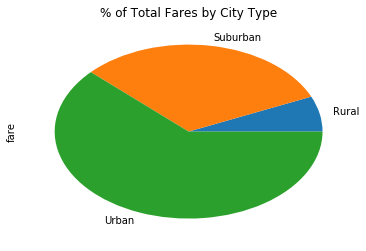

In [172]:
type_fare = city_type_fare.plot(kind="pie", y="fare", title=("% of Total Fares by City Type"))
plt.show()

In [173]:
# % of Total Rides by City Type
city_type_rides = city_df["ride_id"].count()
city_type_rides.head()


type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

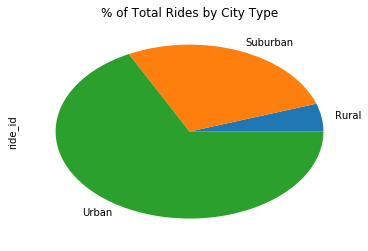

In [179]:
city_type_tables = city_type_rides.plot(kind="pie", y="ride_id", title=("% of Total Rides by City Type"))
plt.show()

In [177]:
# % of Total Drivers by City Type

city_type_drivers = city_df["driver_count"].count()
city_type_drivers.head()

type
Rural        125
Suburban     657
Urban       1625
Name: driver_count, dtype: int64

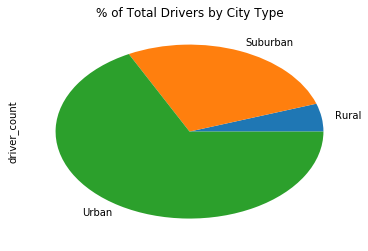

In [178]:
type_drivers = city_type_drivers.plot(kind="pie", y="driver_count", title=("% of Total Drivers by City Type"))
plt.show()